In [4]:
import pandas as pd

# Load the data (assuming it's saved as 'gdp_data.csv')
data = pd.read_csv("data/alfredgraph.csv")

In [5]:
data["observation_date"] = pd.to_datetime(data["observation_date"])

In [6]:
print(data.head())

  observation_date  GDPC1_20241030  GDPC1_20241127
0       2002-01-01       14372.785       14372.785
1       2002-04-01       14460.848       14460.848
2       2002-07-01       14519.633       14519.633
3       2002-10-01       14537.580       14537.580
4       2003-01-01       14614.141       14614.141


In [21]:
data

,observation_date,GDPC1_20241030,GDPC1_20241127,Revision,QoQ_Growth_V1,YoY_Growth_V1,QoQ_Growth_V2,YoY_Growth_V2
0,2002-01-01,14372.785,14372.785,0.000,NaN,NaN,NaN,NaN
1,2002-04-01,14460.848,14460.848,0.000,0.612707,NaN,0.612707,NaN
2,2002-07-01,14519.633,14519.633,0.000,0.406511,NaN,0.406511,NaN
3,2002-10-01,14537.580,14537.580,0.000,0.123605,NaN,0.123605,NaN
4,2003-01-01,14614.141,14614.141,0.000,0.526642,1.679257,0.526642,1.679257
...,...,...,...,...,...,...,...,...
86,2023-07-01,22780.933,22780.933,0.000,1.071523,3.236308,1.071523,3.236308
87,2023-10-01,22960.600,22960.600,0.000,0.788673,3.196217,0.788673,3.196217
88,2024-01-01,23053.545,23053.545,0.000,0.404802,2.901832,0.404802,2.901832
89,2024-04-01,23223.906,23223.906,0.000,0.738980,3.036849,0.738980,3.036849


In [9]:
data["Revision"] = data["GDPC1_20241127"] - data["GDPC1_20241030"]

# View revisions
print(data[["observation_date", "Revision"]])
print((data["Revision"]!= 0).sum())

   observation_date  Revision
0        2002-01-01     0.000
1        2002-04-01     0.000
2        2002-07-01     0.000
3        2002-10-01     0.000
4        2003-01-01     0.000
..              ...       ...
86       2023-07-01     0.000
87       2023-10-01     0.000
88       2024-01-01     0.000
89       2024-04-01     0.000
90       2024-07-01     0.485

[91 rows x 2 columns]
1


In [14]:
# Quarter-over-quarter (QoQ) Growth Rate
data["QoQ_Growth_V1"] = data["GDPC1_20241030"].pct_change() * 100
data["QoQ_Growth_V2"] = data["GDPC1_20241127"].pct_change() * 100

# Year-over-Year (YoY) Growth Rate
data["YoY_Growth_V1"] = data["GDPC1_20241030"].pct_change(periods=4) * 100
data["YoY_Growth_V2"] = data["GDPC1_20241127"].pct_change(periods=4) * 100

# View growth rates
print(data[["observation_date", "QoQ_Growth_V1", "YoY_Growth_V1"]])
print(data[["observation_date", "QoQ_Growth_V2", "YoY_Growth_V2"]])

   observation_date  QoQ_Growth_V1  YoY_Growth_V1
0        2002-01-01            NaN            NaN
1        2002-04-01       0.612707            NaN
2        2002-07-01       0.406511            NaN
3        2002-10-01       0.123605            NaN
4        2003-01-01       0.526642       1.679257
..              ...            ...            ...
86       2023-07-01       1.071523       3.236308
87       2023-10-01       0.788673       3.196217
88       2024-01-01       0.404802       2.901832
89       2024-04-01       0.738980       3.036849
90       2024-07-01       0.699030       2.657112

[91 rows x 3 columns]
   observation_date  QoQ_Growth_V2  YoY_Growth_V2
0        2002-01-01            NaN            NaN
1        2002-04-01       0.612707            NaN
2        2002-07-01       0.406511            NaN
3        2002-10-01       0.123605            NaN
4        2003-01-01       0.526642       1.679257
..              ...            ...            ...
86       2023-07-01       1

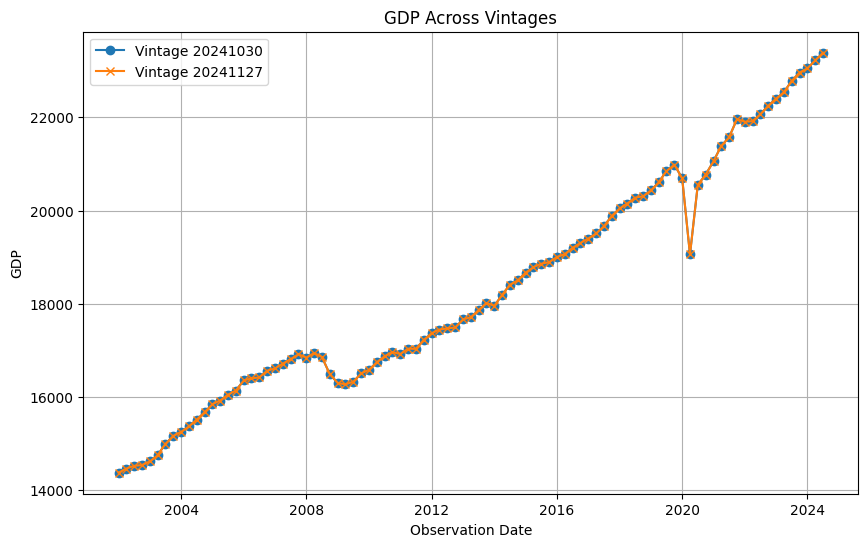

In [11]:
import matplotlib.pyplot as plt

# Plot GDP across vintages
plt.figure(figsize=(10, 6))
plt.plot(
    data["observation_date"],
    data["GDPC1_20241030"],
    label="Vintage 20241030",
    marker="o",
)
plt.plot(
    data["observation_date"],
    data["GDPC1_20241127"],
    label="Vintage 20241127",
    marker="x",
)
plt.title("GDP Across Vintages")
plt.xlabel("Observation Date")
plt.ylabel("GDP")
plt.legend()
plt.grid()
plt.show()

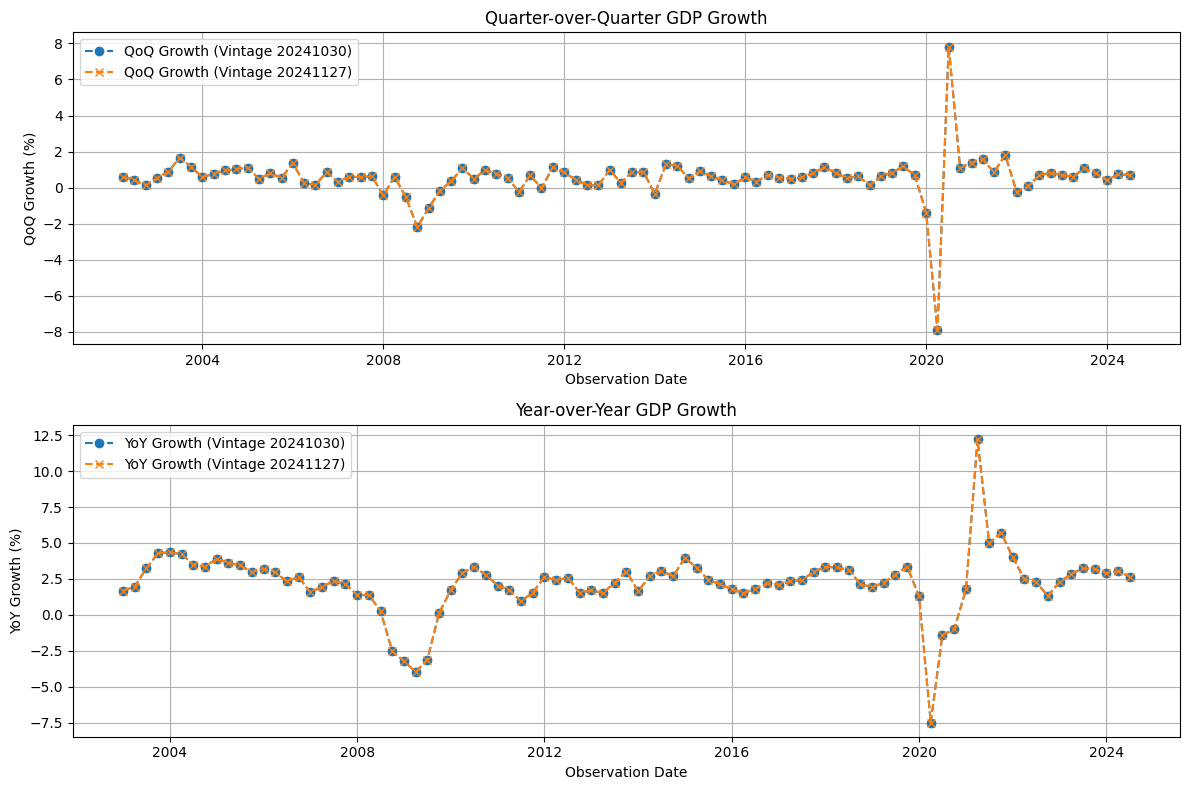

In [15]:

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Subplot 1: GDP growth rates
plt.subplot(2, 1, 1)
plt.plot(
    data["observation_date"],
    data["QoQ_Growth_V1"],
    label="QoQ Growth (Vintage 20241030)",
    marker="o",
    linestyle="--",
)
plt.plot(
    data["observation_date"],
    data["QoQ_Growth_V2"],
    label="QoQ Growth (Vintage 20241127)",
    marker="x",
    linestyle="--",
)
plt.title("Quarter-over-Quarter GDP Growth")
plt.xlabel("Observation Date")
plt.ylabel("QoQ Growth (%)")
plt.legend()
plt.grid()

# Subplot 2: Year-over-Year growth rates
plt.subplot(2, 1, 2)
plt.plot(
    data["observation_date"],
    data["YoY_Growth_V1"],
    label="YoY Growth (Vintage 20241030)",
    marker="o",
    linestyle="--",
)
plt.plot(
    data["observation_date"],
    data["YoY_Growth_V2"],
    label="YoY Growth (Vintage 20241127)",
    marker="x",
    linestyle="--",
)
plt.title("Year-over-Year GDP Growth")
plt.xlabel("Observation Date")
plt.ylabel("YoY Growth (%)")
plt.legend()
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Descriptive Statistics

In [16]:
qoq_descriptive = data[["QoQ_Growth_V1", "QoQ_Growth_V2"]].describe()
yoy_descriptive = data[["YoY_Growth_V1", "YoY_Growth_V2"]].describe()

# Print the results
print("Quarter-over-Quarter (QoQ) Growth - Descriptive Statistics")
print(qoq_descriptive)
print("\nYear-over-Year (YoY) Growth - Descriptive Statistics")
print(yoy_descriptive)

Quarter-over-Quarter (QoQ) Growth - Descriptive Statistics
       QoQ_Growth_V1  QoQ_Growth_V2
count      90.000000      90.000000
mean        0.551112       0.551135
std         1.324839       1.324842
min        -7.908965      -7.908965
25%         0.363456       0.363456
50%         0.621551       0.621551
75%         0.868669       0.868669
max         7.830225       7.830225

Year-over-Year (YoY) Growth - Descriptive Statistics
       YoY_Growth_V1  YoY_Growth_V2
count      87.000000      87.000000
mean        2.208304       2.208329
std         2.214619       2.214624
min        -7.502366      -7.502366
25%         1.722289       1.722289
50%         2.403336       2.403336
75%         3.163124       3.163124
max        12.239255      12.239255


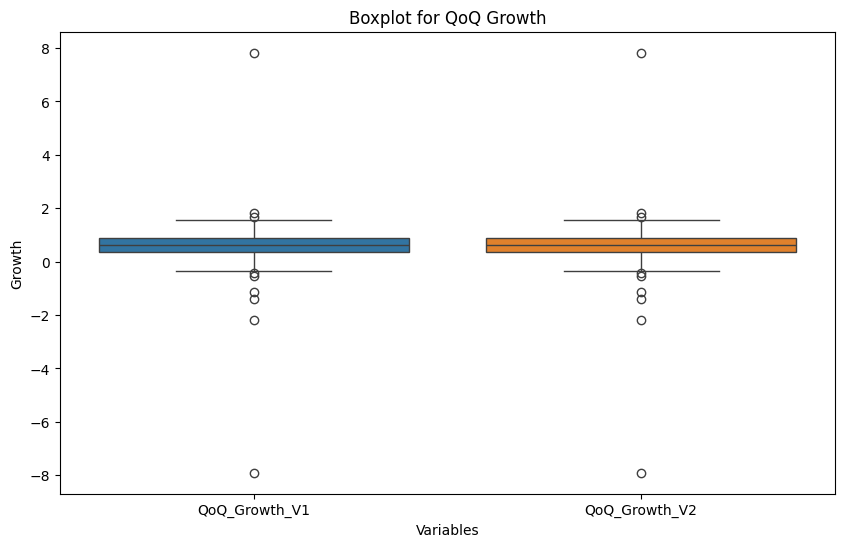

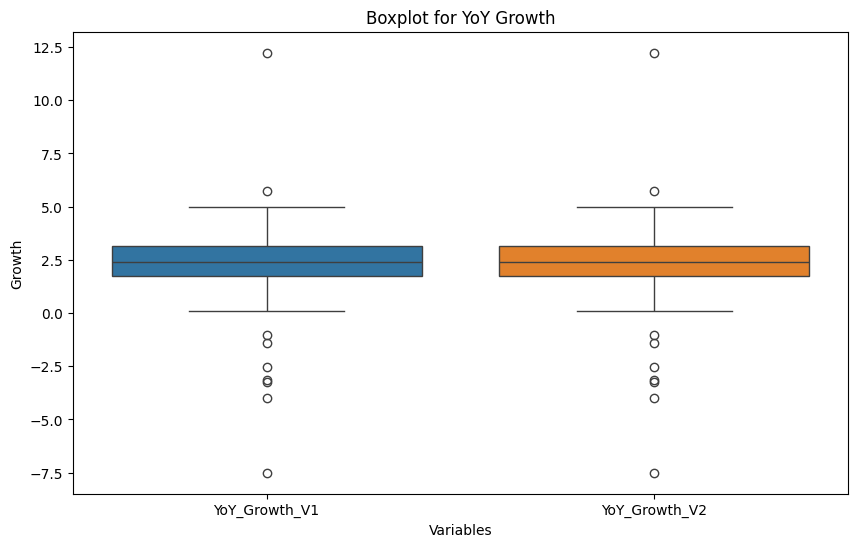

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for QoQ growth
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["QoQ_Growth_V1", "QoQ_Growth_V2"]])
plt.title("Boxplot for QoQ Growth")
plt.ylabel("Growth")
plt.xlabel("Variables")
plt.show()

# Boxplots for YoY growth
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["YoY_Growth_V1", "YoY_Growth_V2"]])
plt.title("Boxplot for YoY Growth")
plt.ylabel("Growth")
plt.xlabel("Variables")
plt.show()

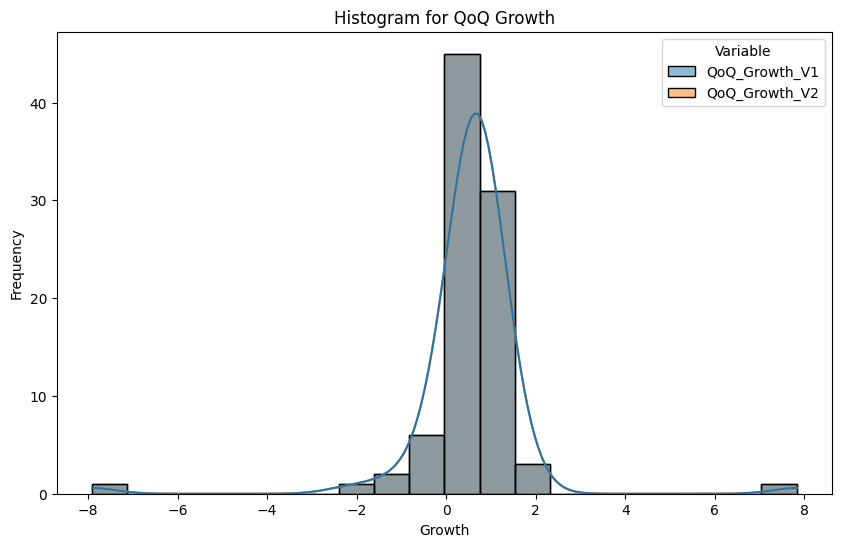

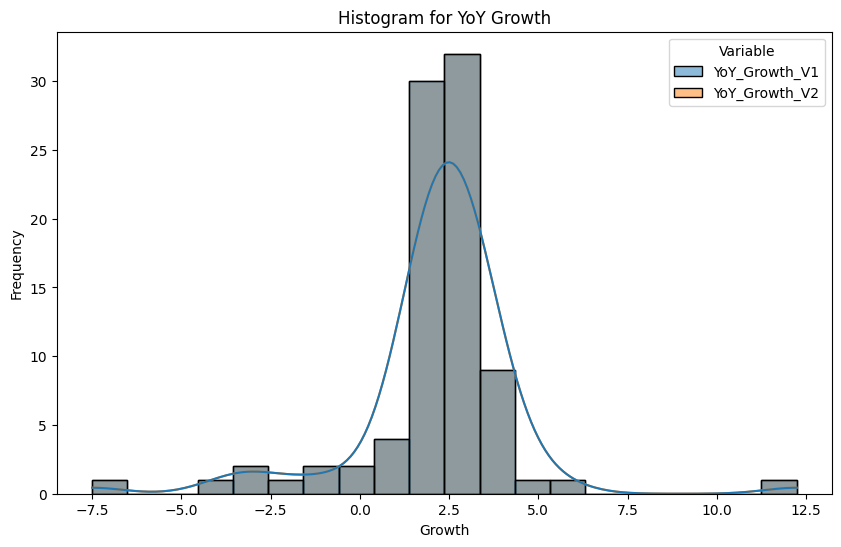

In [20]:
# Melt the data for easier visualization with hue
qoq_data_melted = data[["QoQ_Growth_V1", "QoQ_Growth_V2"]].melt(var_name="Variable", value_name="Growth")
yoy_data_melted = data[["YoY_Growth_V1", "YoY_Growth_V2"]].melt(var_name="Variable", value_name="Growth")

# Histograms with KDE for QoQ Growth
plt.figure(figsize=(10, 6))
sns.histplot(data=qoq_data_melted, x="Growth", hue="Variable", kde=True, bins=20)
plt.title("Histogram for QoQ Growth")
plt.xlabel("Growth")
plt.ylabel("Frequency")
plt.show()

# Histograms with KDE for YoY Growth
plt.figure(figsize=(10, 6))
sns.histplot(data=yoy_data_melted, x="Growth", hue="Variable", kde=True, bins=20)
plt.title("Histogram for YoY Growth")
plt.xlabel("Growth")
plt.ylabel("Frequency")
plt.show()
